### **Initialization**

In [24]:
# !curl -s https://course.fast.ai/setup/colab | bash

In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### **Downloading all Dependencies.**

In [26]:
from fastai.basics import *

**Linear Regression**

In [27]:
n = 200

In [28]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[ 0.6053,  1.0000],
        [-0.5762,  1.0000],
        [ 0.9872,  1.0000],
        [ 0.8056,  1.0000],
        [ 0.1182,  1.0000]])

In [29]:
a = tensor(3., 2)
a

tensor([3., 2.])

In [30]:
y = x@a + 0.25*torch.randn(n)

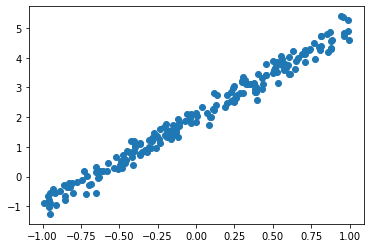

In [31]:
plt.scatter(x[:, 0], y)

In [32]:
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

In [33]:
a = tensor(-1., 1)

In [34]:
y_hat = x@a
mse(y_hat, y)

tensor(5.9508)

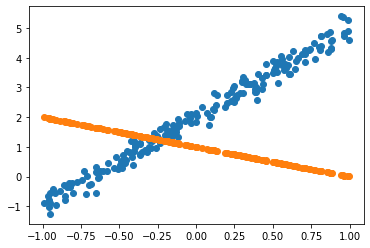

In [35]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

### **Gradient Descent**

In [36]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [37]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t%10 == 0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [38]:
lr = 1e-1
for t in range(200):
  update()

tensor(5.9508, grad_fn=<MeanBackward0>)
tensor(1.4275, grad_fn=<MeanBackward0>)
tensor(0.4418, grad_fn=<MeanBackward0>)
tensor(0.1628, grad_fn=<MeanBackward0>)
tensor(0.0829, grad_fn=<MeanBackward0>)
tensor(0.0600, grad_fn=<MeanBackward0>)
tensor(0.0534, grad_fn=<MeanBackward0>)
tensor(0.0515, grad_fn=<MeanBackward0>)
tensor(0.0510, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)
tensor(0.0508, grad_fn=<MeanBackward0>)


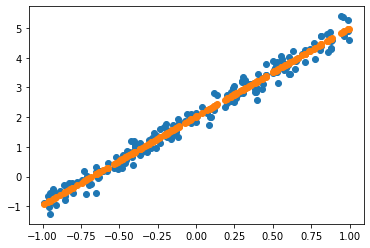

In [39]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@a.detach())

### **Animation**

In [40]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [41]:
a = nn.Parameter(tensor(-1., 1))

fig = plt.figure()
plt.scatter(x[:, 0], y, c="orange")
line, = plt.plot(x[:, 0], x@a.detach())
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.detach())
  return line,

animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=20)